# 1. Configuração do Ambiente
Instale as bibliotecas necessárias. Vamos usar pandas langchain_community langchain_google_genai IPython pandas.

In [ ]:
# Instale as bibliotecas necessárias
!pip install pandas
!pip install langchain_community
!pip install langchain_experimental
!pip install langchain_google_genai
!pip install langchain_core
!pip install networkx
!pip install IPython
!pip install langchain_google_genai

# Importando bibliotecas necessárias

In [ ]:
from langchain_google_genai import GoogleGenerativeAI
from langchain_experimental.graph_transformers import LLMGraphTransformer
import networkx as nx
import matplotlib.pyplot as plt
import os
from langchain_core.documents import Document

# Used to securely store your API key

In [ ]:
from google.colab import userdata
api_key=userdata.get('Teste_key')

# Configuração do modelo genAI

In [ ]:
GEMINI_MODEL_NAME = "gemini-pro"

# Configuração do modelo genAI usando LangChain
if not api_key:
    raise ValueError("API key not found. Please set the GOOGLE_API_KEY environment variable.")

# Definir o modelo e o prompt

In [ ]:
!pip install json-repair

In [ ]:
llm = GoogleGenerativeAI(model=GEMINI_MODEL_NAME, google_api_key=api_key, temperature=0.6)

llm_transformer = LLMGraphTransformer(llm=llm)

text = """Edson Arantes do Nascimento, mais conhecido como Pelé, nasceu em Três Corações na cidade de São Paulo em 23 de outubro de 1940.
Pelé foi um futebolista brasileiro que atuou como atacante,
Pelé foi descrito como o Rei do Futebol e é amplamente considerado como o maior atleta de todos os tempos.
Em 2000, Pelé foi eleito Jogador do Século pela Federação Internacional de História e Estatísticas do Futebol (IFFHS).
Nesse mesmo ano, Pelé foi eleito Atleta do Século pelo Comitê Olímpico Internacional.
De acordo com a IFFHS, Pelé é o quinto maior goleador da história do futebol em jogos oficiais, tendo marcado 767 gols em 812 partidas.
No total foram 1283 gols em 1363 jogos, incluindo amistosos não oficiais, um recorde mundial do Guinness.
Pelé começou a jogar pelo Santos Futebol Clube aos quinze anos de idade, e pela Seleção Brasileira aos dezesseis,
Pelé sagrando-se campeão de três edições da Copa do Mundo FIFA: 1958, 1962 e 1970, sendo o único a fazê-lo como jogador.
Contando os gols oficiais, Pelé é o segundo maior goleador da história da Seleção Brasileira, com 77 gols em 92 jogos.
Em clubes, Pelé é o maior artilheiro da história do Santos e o levou a várias conquistas, com destaque para duas Copas Libertadores da América e dois Mundiais Interclubes, vencidos em 1962 e 1963.
Após se aposentar em 1977, Pelé tornou-se embaixador mundial do futebol e fez muitos trabalhos de atuação e comerciais.
Em janeiro de 1995, Pelé foi nomeado ministro do esporte no governo Fernando Henrique Cardoso.
Em seus últimos anos de vida, Pelé sofria de câncer de cólon, diagnosticado em 2021.
Pelé morreu, no dia 29 de dezembro de 2022 na capital paulista.
"""

# Processar documentos e criar grafos

In [ ]:
documents = [Document(page_content=text)]

graph_documents = llm_transformer.convert_to_graph_documents(documents)

# Plotar os gráficos para os grafos gerados

In [ ]:
print("Grafo:")
print(f"Nodes:{graph_documents[0].nodes}")
print(f"Relationships:{graph_documents[0].relationships}")

Grafo:
Nodes:[Node(id='duas Copas Libertadores da América', type='Event'), Node(id='Rei do Futebol', type='Title'), Node(id='Atleta do Século', type='Award'), Node(id='Campeão de três edições da Copa do Mundo FIFA', type='Achievement'), Node(id='Santos Futebol Clube', type='Organization'), Node(id='Atacante', type='Position'), Node(id='quinze anos', type='Duration'), Node(id='São Paulo', type='Location'), Node(id='23 de outubro de 1940', type='Date'), Node(id='1970', type='Year'), Node(id='Edson Arantes do Nascimento', type='Person'), Node(id='Copa do Mundo FIFA', type='Event'), Node(id='Maior atleta de todos os tempos', type='Title'), Node(id='Seleção Brasileira', type='Organization'), Node(id='dezesseis anos', type='Duration'), Node(id='História da Seleção Brasileira', type='Category'), Node(id='767 gols', type='Number'), Node(id='Três Corações', type='Location'), Node(id='1958', type='Year'), Node(id='1283 gols', type='Number'), Node(id='Federação Internacional de História e Estatís

In [ ]:
nodes=graph_documents[0].nodes
relationships=graph_documents[0].relationships
G = nx.DiGraph()

# Adicionar nós ao grafo

In [ ]:
for node in nodes:
    G.add_node(node.id, label=node.id)

# Adicionar relações ao grafo

In [ ]:
for relationship in relationships:
    G.add_edge(relationship.source.id, relationship.target.id, label=relationship.type)

pos = nx.spring_layout(G)
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

# Desenhar nós

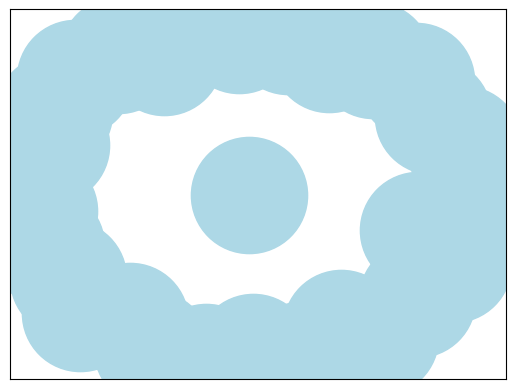

In [ ]:
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='lightblue')

# Desenhar arestas

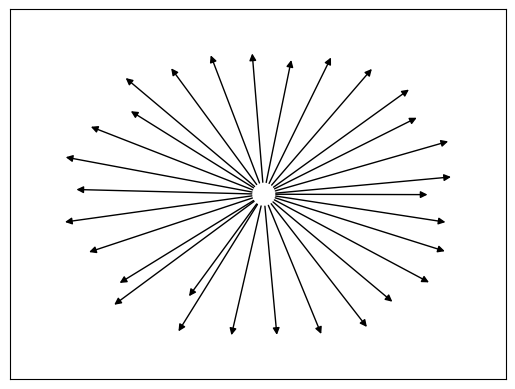

In [ ]:
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

# Desenhar rótulos dos nós

{'duas Copas Libertadores da América': Text(0.9234264978214561, 0.35056164475654095, 'duas Copas Libertadores da América'),
 'Rei do Futebol': Text(-0.9960462880868334, 0.24494779446493087, 'Rei do Futebol'),
 'Atleta do Século': Text(-0.06264966559488702, 0.9546507373639336, 'Atleta do Século'),
 'Campeão de três edições da Copa do Mundo FIFA': Text(0.7292175612135374, 0.6979045094843983, 'Campeão de três edições da Copa do Mundo FIFA'),
 'Santos Futebol Clube': Text(-0.6998969787535618, 0.7744917269370445, 'Santos Futebol Clube'),
 'Atacante': Text(0.8282399769388259, -0.5872127937559234, 'Atacante'),
 'quinze anos': Text(0.8279589360058425, -0.0032841014081569113, 'quinze anos'),
 'São Paulo': Text(-0.9462666267476458, 0.030713118065370103, 'São Paulo'),
 '23 de outubro de 1940': Text(-0.8835875876754539, -0.3859590315461739, '23 de outubro de 1940'),
 '1970': Text(0.5191362684834574, -0.8902475309434174, '1970'),
 'Edson Arantes do Nascimento': Text(-0.0032362617032896854, -0.00054

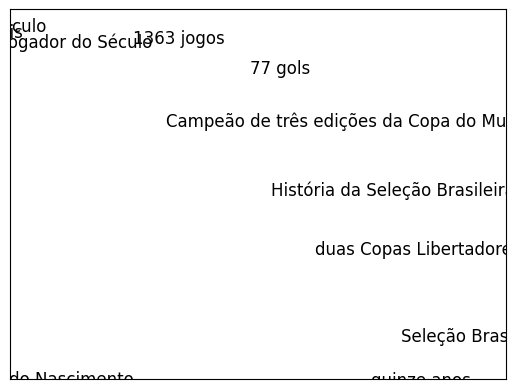

In [ ]:
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)

# Desenhar rótulos das arestas

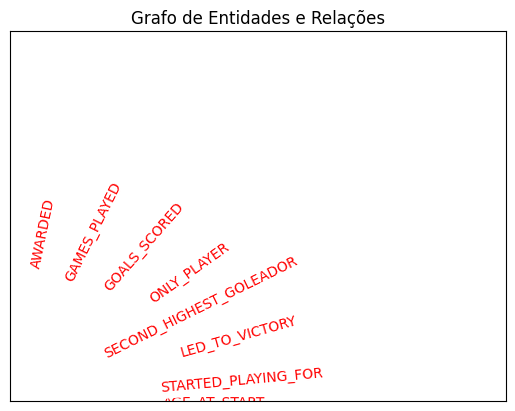

Número de nós: 31 
Número de arestas: 30 
Proporção entre arestas e nós: 0.97 
 duas Copas Libertadores da América : Grau de centralidade =  0.03 
 Rei do Futebol : Grau de centralidade =  0.03 
 Atleta do Século : Grau de centralidade =  0.03 
 Campeão de três edições da Copa do Mundo FIFA : Grau de centralidade =  0.03 
 Santos Futebol Clube : Grau de centralidade =  0.03 
 Atacante : Grau de centralidade =  0.03 
 quinze anos : Grau de centralidade =  0.03 
 São Paulo : Grau de centralidade =  0.03 
 23 de outubro de 1940 : Grau de centralidade =  0.03 
 1970 : Grau de centralidade =  0.03 
 Edson Arantes do Nascimento : Grau de centralidade =  1.00 
 Copa do Mundo FIFA : Grau de centralidade =  0.03 
 Maior atleta de todos os tempos : Grau de centralidade =  0.03 
 Seleção Brasileira : Grau de centralidade =  0.03 
 dezesseis anos : Grau de centralidade =  0.03 
 História da Seleção Brasileira : Grau de centralidade =  0.03 
 767 gols : Grau de centralidade =  0.03 
 Três Corações 

In [ ]:
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Grafo de Entidades e Relações")
plt.show()

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print ( f'Número de nós: {num_nodes} ' )
print ( f'Número de arestas: {num_edges} ' )
print ( f'Proporção entre arestas e nós: { round (num_edges / num_nodes, 2 )} ' )

degree_centrality = nx.degree_centrality(G)
for node,central in degree_centrality.items():
    print(f' {node} : Grau de centralidade = {central: .2f} ' )

closeness_centrality = nx.closeness_centrality(G)
for node, central in closeness_centrality.items():
    print(f'Centralidade de proximidade de {node} : {central: .2f} ' )

# Calcular medidas de centralidade

In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Visualizar medidas de centralidade

In [ ]:
plt.figure(figsize=( 15 , 10 ))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

# Centralidade de grau

Text(0.5, 1.0, 'Grau da Centralidade')

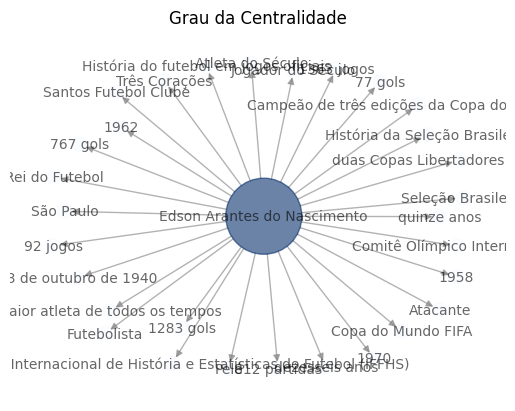

In [ ]:
plt.subplot(1,1,1)
nx.draw(G, pos , with_labels=True, font_size= 10 , node_size=[v * 3000  for v in degree_centrality.values()], node_color=list(degree_centrality.values()), cmap=plt.cm.Blues, edge_color= 'gray' , alpha= 0.6 )
plt.title( 'Grau da Centralidade' )

# Centralidade de intermediação

Text(0.5, 1.0, 'Centralidade de intermediação')

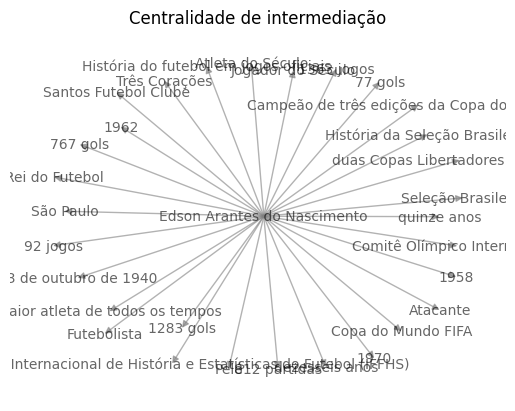

In [ ]:
plt.subplot( 1,1,1 )
nx.draw(G, pos , with_labels=True, font_size= 10 , node_size=[v * 3000  for v in betweenness_centrality.values()], node_color=list(betweenness_centrality.values()), cmap=plt.cm.Oranges, edge_color= 'gray' , alpha= 0.6 )
plt.title( 'Centralidade de intermediação')

# Centralidade de proximidade

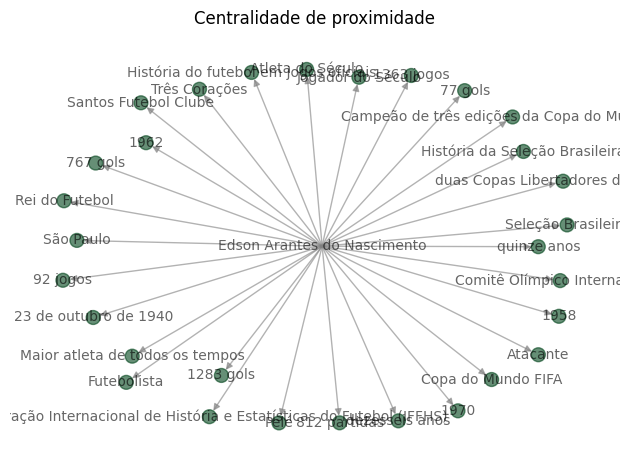

In [ ]:
plt.subplot( 1,1,1 )
nx.draw(G, pos , with_labels=True, font_size= 10 , node_size=[v * 3000  for v in closeness_centrality.values()], node_color=list(closeness_centrality.values()), cmap=plt.cm.Greens, edge_color= 'gray' , alpha= 0.6 )
plt.title( 'Centralidade de proximidade')

plt.tight_layout()
plt.show()

source_node = 'Edson Arantes do Nascimento'
target_node = 'Rei do Futebol'

# Find the shortest path

In [ ]:
shortest_path = nx.shortest_path(G, source=source_node, target=target_node)

# Visualize the shortest path

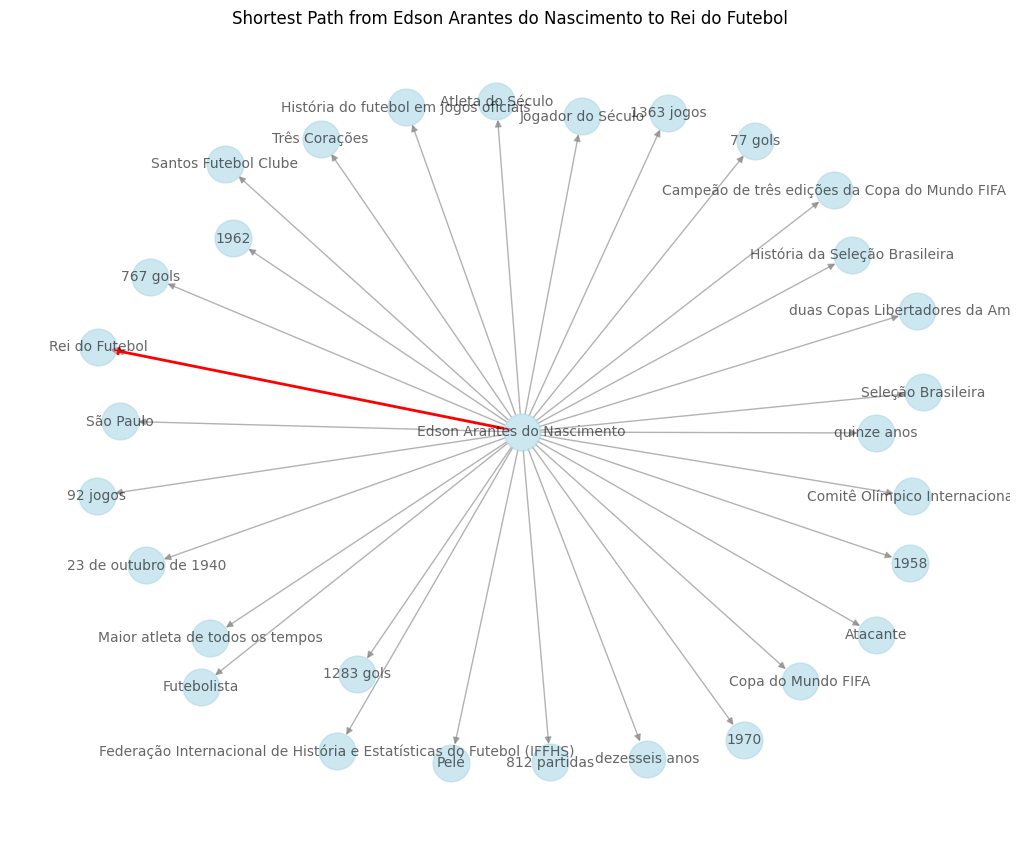

Shortest Path: ['Edson Arantes do Nascimento', 'Rei do Futebol']


In [ ]:
plt.figure(figsize=(10, 8))
path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.title(f'Shortest Path from {source_node} to {target_node}')
plt.show()
print('Shortest Path:', shortest_path)

In [ ]:
!pip install node2vec
!pip install KMeans

# Generate node embeddings using node2vec

In [ ]:
from node2vec import Node2Vec

nodevec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4) # You can adjust these parameters
model = nodevec.fit(window=10, min_count=1, batch_words=4) # Training the model

Computing transition probabilities:   0%|          | 0/31 [00:00<?, ?it/s]

# Visualize node embeddings using t-SNE

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# Get embeddings for all nodes

In [ ]:
embeddings = np.array([model.wv[node] for node in G.nodes()])

# Reduce dimensionality using t-SNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=10, n_iter=400)
embeddings_2d = tsne.fit_transform(embeddings)

# Visualize embeddings in 2D space with node labels

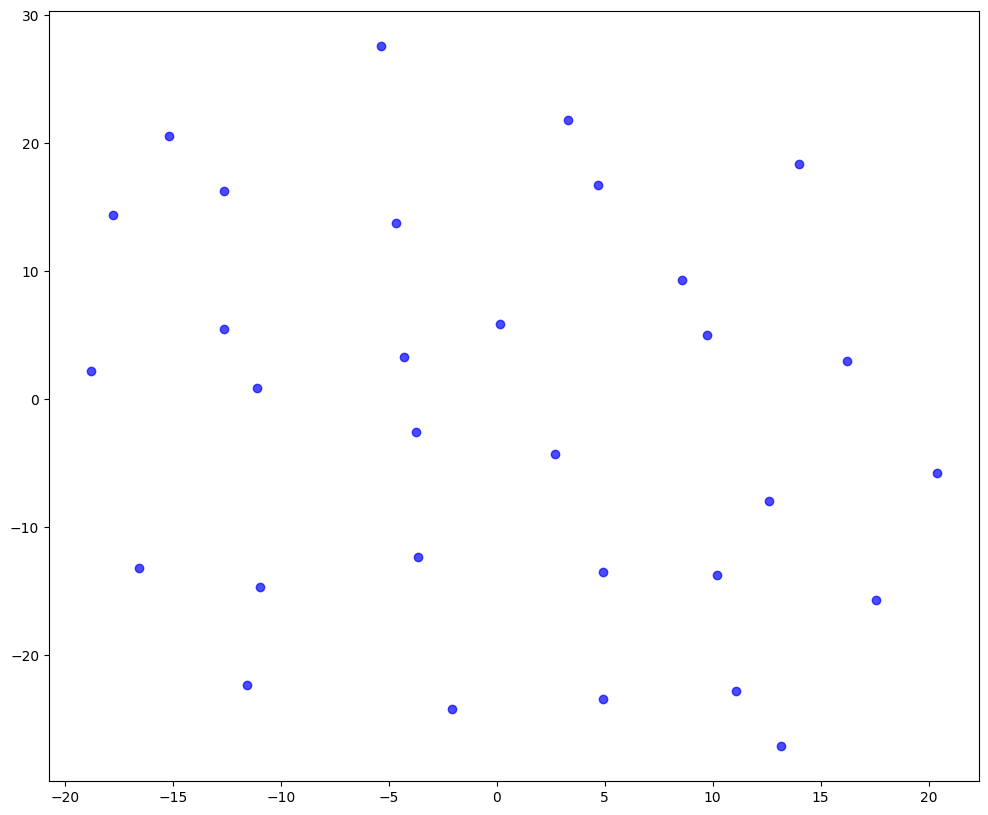

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.7)

# Add node labels

In [ ]:
for i, node in enumerate(G.nodes()):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)
plt.title('Node Embeddings Visualization')
plt.show()

# Perform K-Means clustering on node embeddings

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 3 # Adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Visualize K-Means clustering in the embedding space with node labels

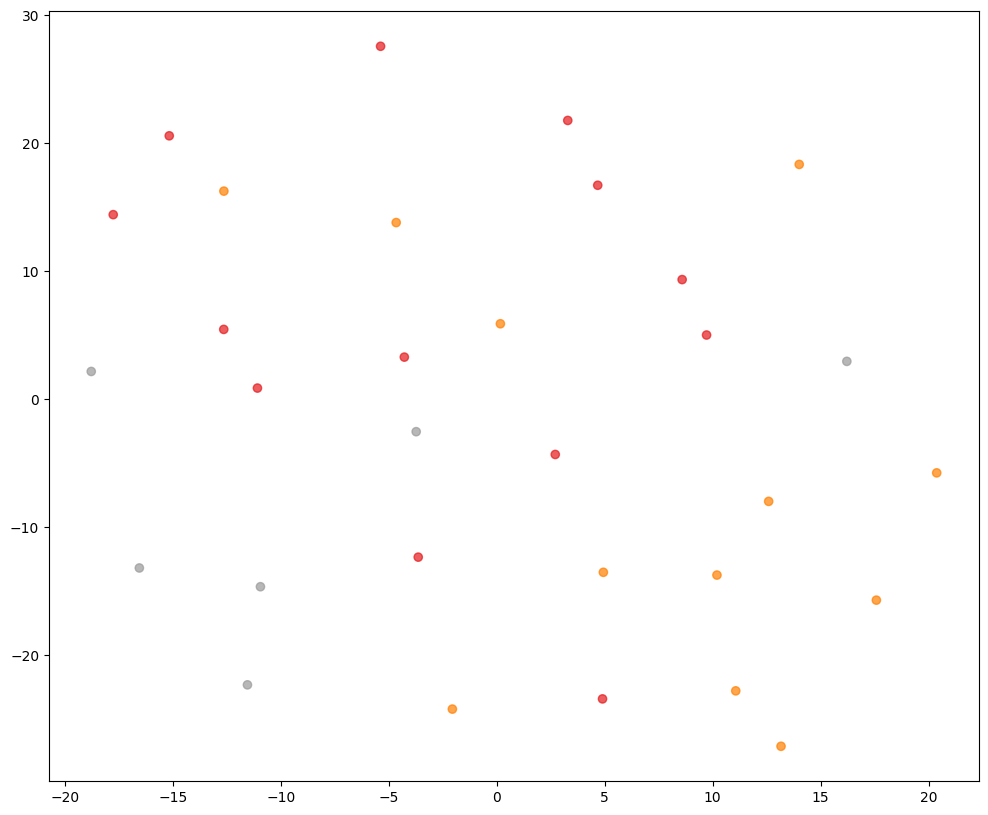

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap=plt.cm.Set1, alpha=0.7)

# Add node labels

In [ ]:
for i, node in enumerate(G.nodes()):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)
plt.title('K-Means Clustering in Embedding Space with Node Labels')
#plt.colorbar(label="Cluster Label")
plt.show()

# Visualize clusters

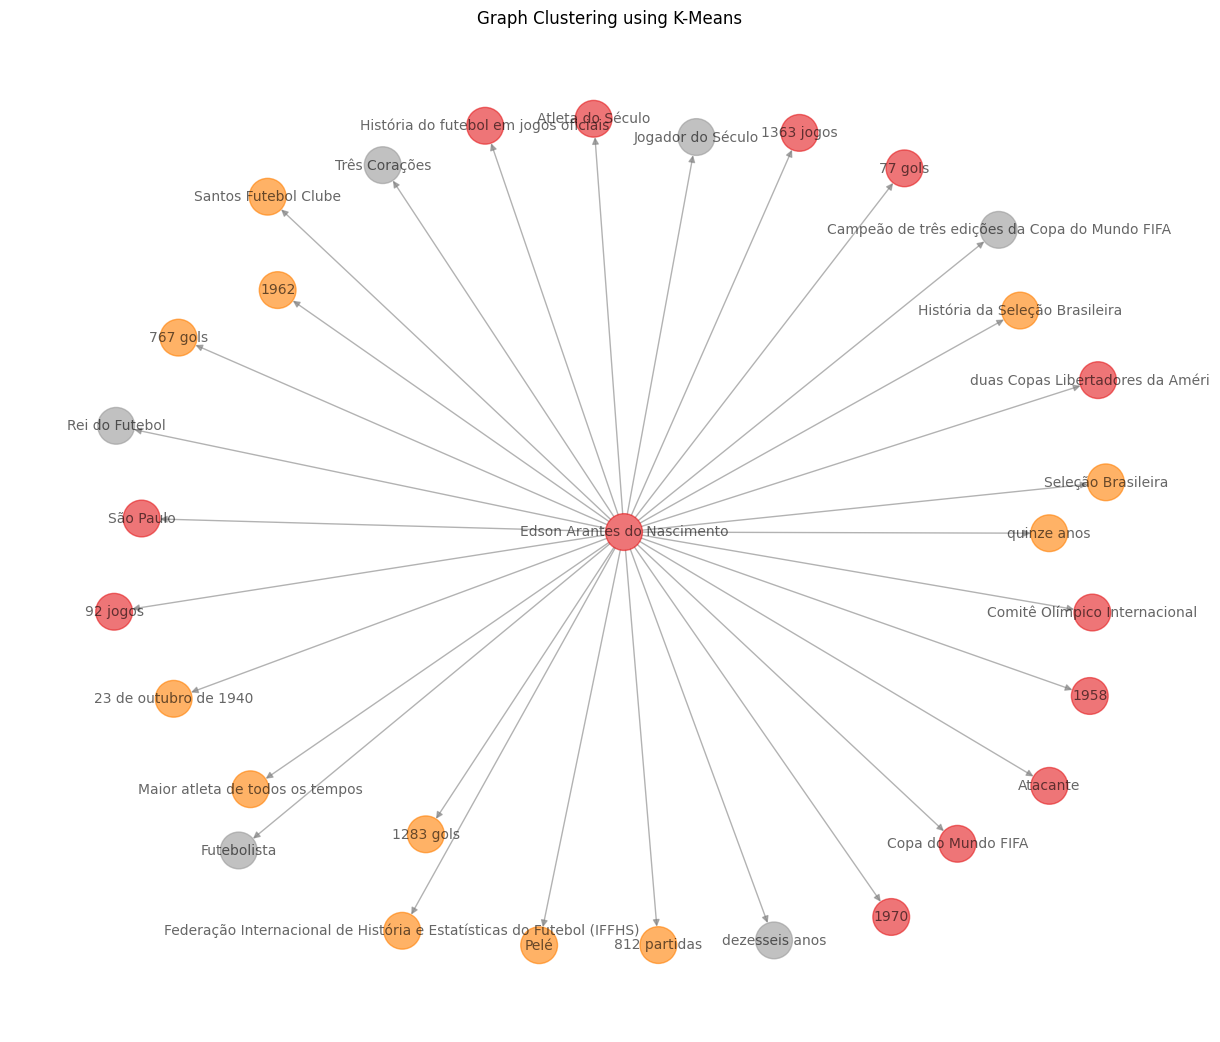

In [ ]:
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color=cluster_labels, cmap=plt.cm.Set1, edge_color='gray', alpha=0.6)
plt.title('Graph Clustering using K-Means')

plt.show()

# Perform DBSCAN clustering on node embeddings

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.0, min_samples=2) # Adjust eps and min_samples
cluster_labels = dbscan.fit_predict(embeddings)

# Visualize clusters

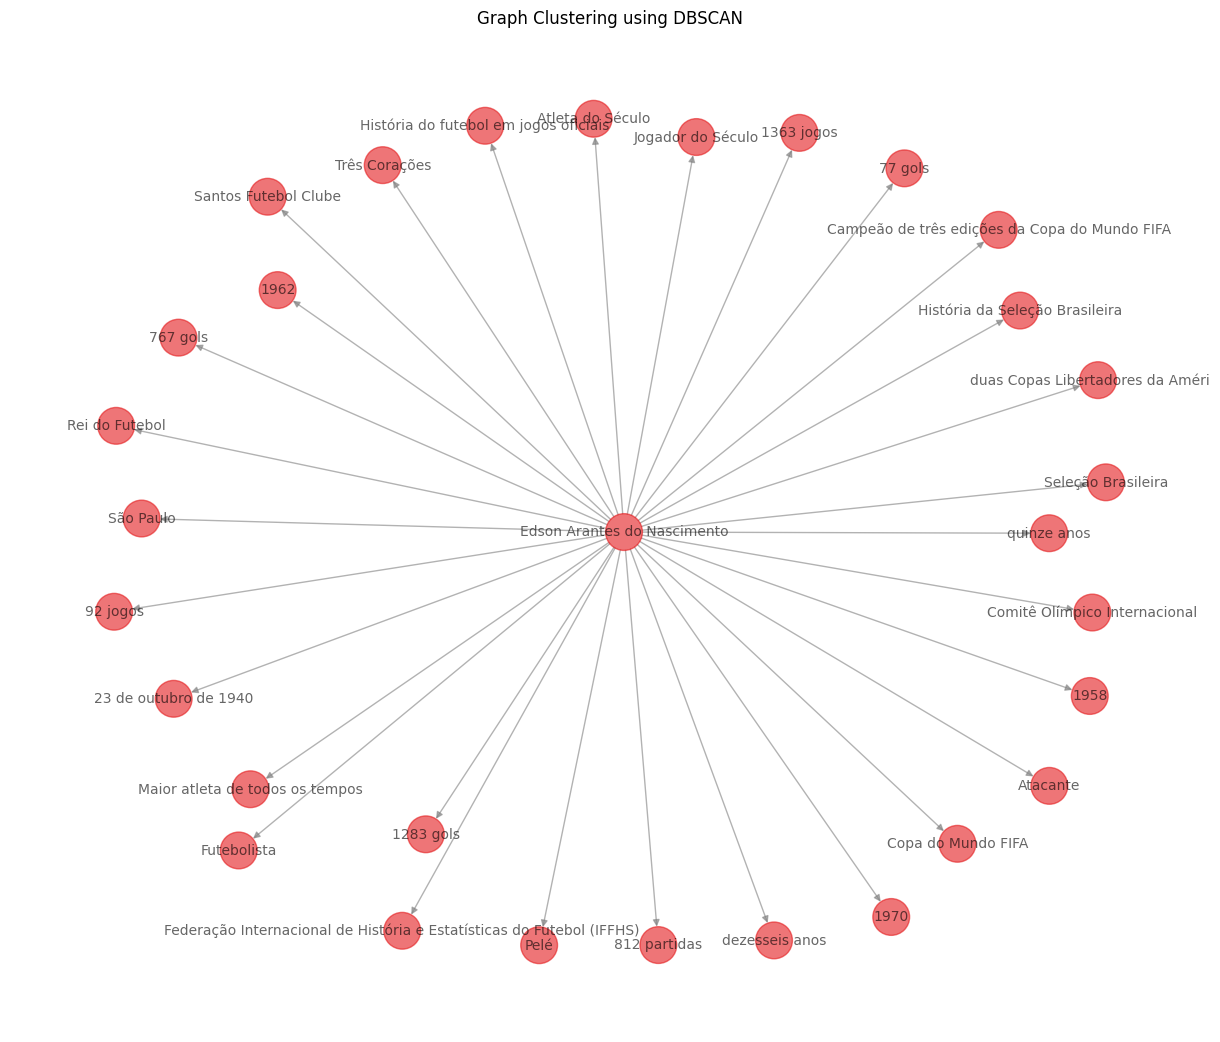

In [ ]:
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color=cluster_labels, cmap=plt.cm.Set1, edge_color='gray', alpha=0.6)
plt.title('Graph Clustering using DBSCAN')
plt.show()